Name: Dwi Fitria Astari 

The Iris flower dataset consists of three species: setosa, versicolor, and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

Use the Iris dataset to develop a model that can classify iris flowers into different species based on their sepal and petal measurements. This dataset is widely used for introductory classification tasks.

In [18]:
#Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

import streamlit as st

In [4]:
#load dataset

df = pd.read_csv("C:\\Users\\Dwi Fitria\\Intern\\CODSOFT\\CODSOFT\\6. Iris Flower\\IRIS.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
#check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

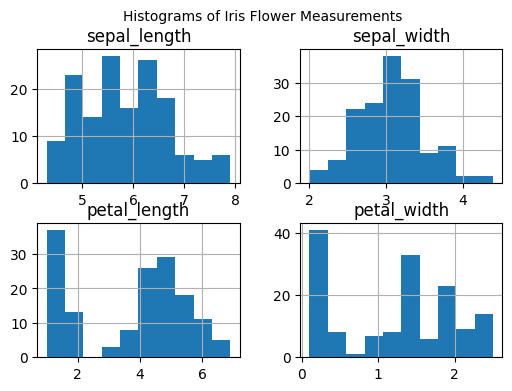

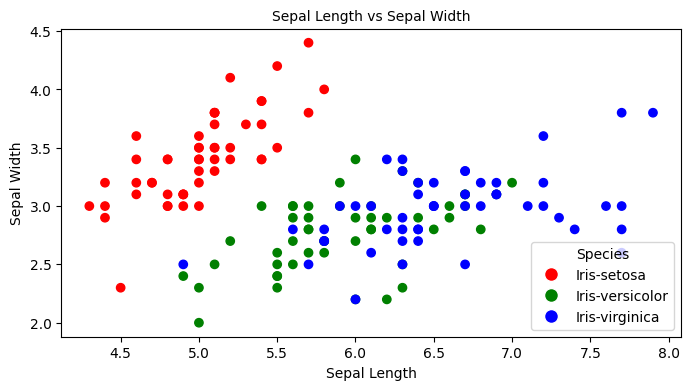

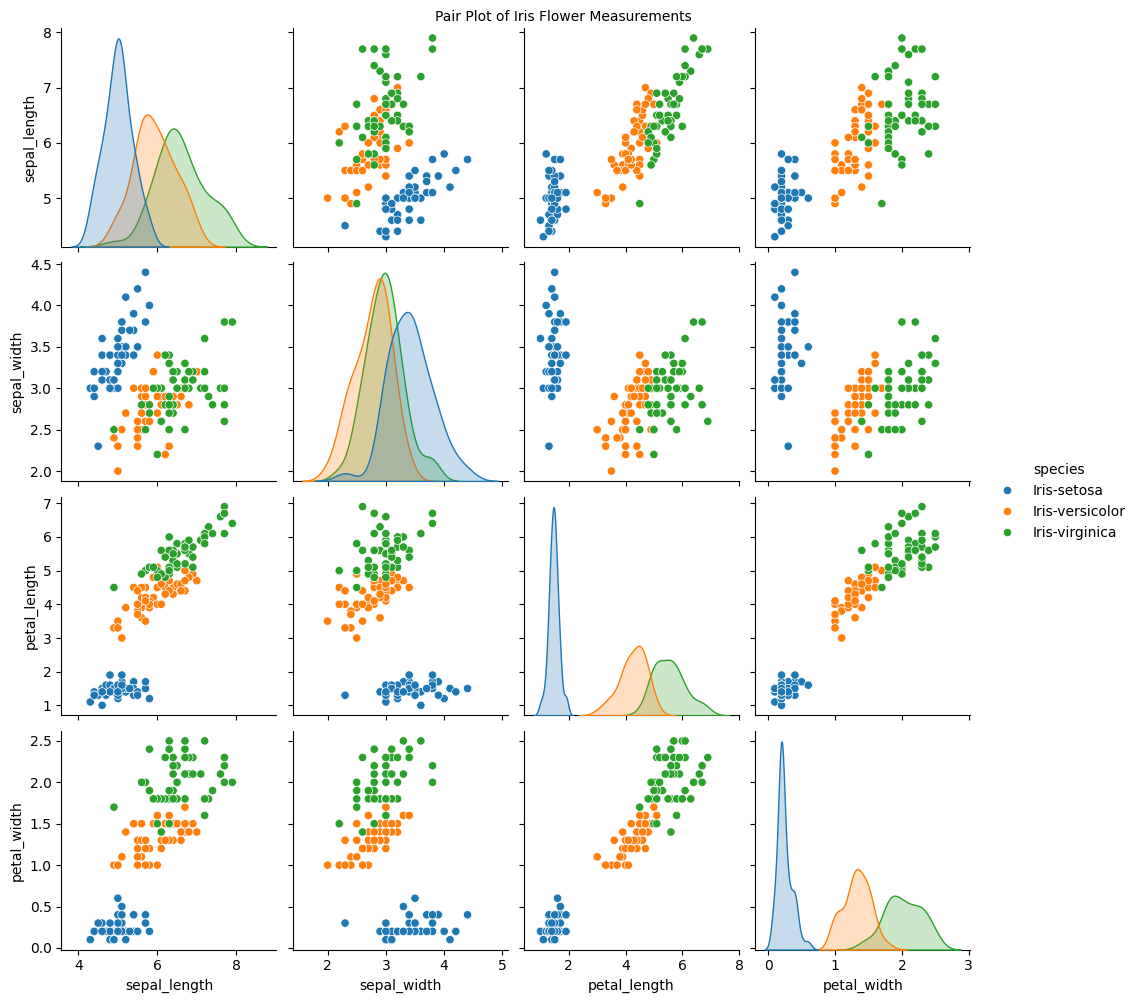

In [ ]:


# Histograms
df.hist(figsize=(6, 4))
plt.suptitle('Histograms of Iris Flower Measurements', fontsize=10)
plt.show()

# Scatter plot
plt.figure(figsize=(8, 4))
colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['species'].apply(lambda x: colors[x]), label=df['species'])
plt.xlabel('Sepal Length', fontsize=10)
plt.ylabel('Sepal Width', fontsize=10)
plt.title('Sepal Length vs Sepal Width', fontsize=10)
# Create a custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=species) for species, color in colors.items()]
plt.legend(title='Species', handles=handles, loc='lower right')
plt.show()

# Pair plot
sns.pairplot(df, hue='species')
plt.suptitle('Pair Plot of Iris Flower Measurements', y=1, fontsize=10)
plt.show()

1. These visuals are clear that the wide range of petal lengths and widths seen in the statistics is reflected in the scatter plots, which show clear separation of species based on these features.
2. Iris Setosa(blue color) is really different visual (length and width of sepal dan petal) than Iris-versocolor and Iris-virginica. 


In [17]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



1. An accuracy of 1.0 (or 100%) and a perfect classification report indicate that your k-nearest neighbors (KNN) model has perfectly classified all the Iris flowers in your test set.
2. The precision for each species is 1.0, meaning that whenever the model predicted a particular species, it was always correct.
3. The f1-scoreis also 1.0 for each species. This indicates a perfect balance between precision and recall.


Let's make the application "Iris Flower Classification App"

In [ ]:
@st.cache_data
def load_data():
    from sklearn.datasets import load_iris
    iris = load_iris()
    iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    return iris_df

iris_df = load_data()

st.title("Iris Flower Classification App")

# Display the dataset
st.subheader("Iris Dataset")
st.dataframe(iris_df.head())

# Pair Plot
st.subheader("Pair Plot of Iris Features")
fig_pairplot = sns.pairplot(iris_df, hue="species")
st.pyplot(fig_pairplot)

# Model Training
st.subheader("Model Training")

X = iris_df.drop('species', axis=1)
y = iris_df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_value = st.slider("Select k value for KNN", min_value=1, max_value=20, value=3)

knn = KNeighborsClassifier(n_neighbors=k_value)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
st.write(f"Accuracy: {accuracy}")

st.write("Classification Report:")
st.text(classification_report(y_test, y_pred))

# Prediction Section
st.subheader("Make a Prediction")

sepal_length = st.number_input("Sepal Length (cm)", min_value=4.0, max_value=8.0, value=5.8)
sepal_width = st.number_input("Sepal Width (cm)", min_value=2.0, max_value=4.5, value=3.0)
petal_length = st.number_input("Petal Length (cm)", min_value=1.0, max_value=7.0, value=3.7)
petal_width = st.number_input("Petal Width (cm)", min_value=0.1, max_value=2.5, value=1.2)

if st.button("Predict"):
    input_data = [[sepal_length, sepal_width, petal_length, petal_width]]
    input_scaled = scaler.transform(input_data)
    prediction = knn.predict(input_scaled)[0]
    st.write(f"Predicted Species: {prediction}")